In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.animation as animation
from matplotlib import colors
import seaborn as sns; sns.set()

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

import pandas as pd

np.random.seed(12345)

In [2]:
# wine データを読み込んで諸元を表示してみる
wine = datasets.load_wine()

# データの諸元
print(wine['DESCR'])

# データの各次元の意味
print(wine['feature_names'])

# 各クラスラベル
print(wine['target_names'])

# データを最初の10個分表示してみる
print(wine['data'][:10])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
# データをデータフレーム化しておこう

Xdat = wine['data']

# 各クラスの名前リストを作っておこう
clsdat = [wine['target_names'][cid] for cid in wine['target']]

dfDat = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
dfCls = pd.DataFrame(data=clsdat, columns=['Class'])

# データフレームを結合しておく
df = pd.concat([dfCls, dfDat], axis=1)
df

Class  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0    class_0    14.23        1.71  2.43               15.6      127.0   
1    class_0    13.20        1.78  2.14               11.2      100.0   
2    class_0    13.16        2.36  2.67               18.6      101.0   
3    class_0    14.37        1.95  2.50               16.8      113.0   
4    class_0    13.24        2.59  2.87               21.0      118.0   
..       ...      ...         ...   ...                ...        ...   
173  class_2    13.71        5.65  2.45               20.5       95.0   
174  class_2    13.40        3.91  2.48               23.0      102.0   
175  class_2    13.27        4.28  2.26               20.0      120.0   
176  class_2    13.17        2.59  2.37               20.0      120.0   
177  class_2    14.13        4.10  2.74               24.5       96.0   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     color_intensity   hue  od280/od315_of_diluted_wines  proline  
0               5.64  1.04                          3.92   1065.0  
1               4.38  1.05                          3.40   1050.0  
2               5.68  1.03                          3.17   1185.0  
3               7.80  0.86                          3.45   1480.0  
4               4.32  1.04                          2.93    735.0  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74    740.0  
174             7.30  0.70                          1.56    750.0  
175            10.20  0.59                          1.56    835.0  
176             9.30  0.60                          1.62    840.0  
177             9.20  0.61                          1.60    560.0  

[178 rows x 14 columns]

c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

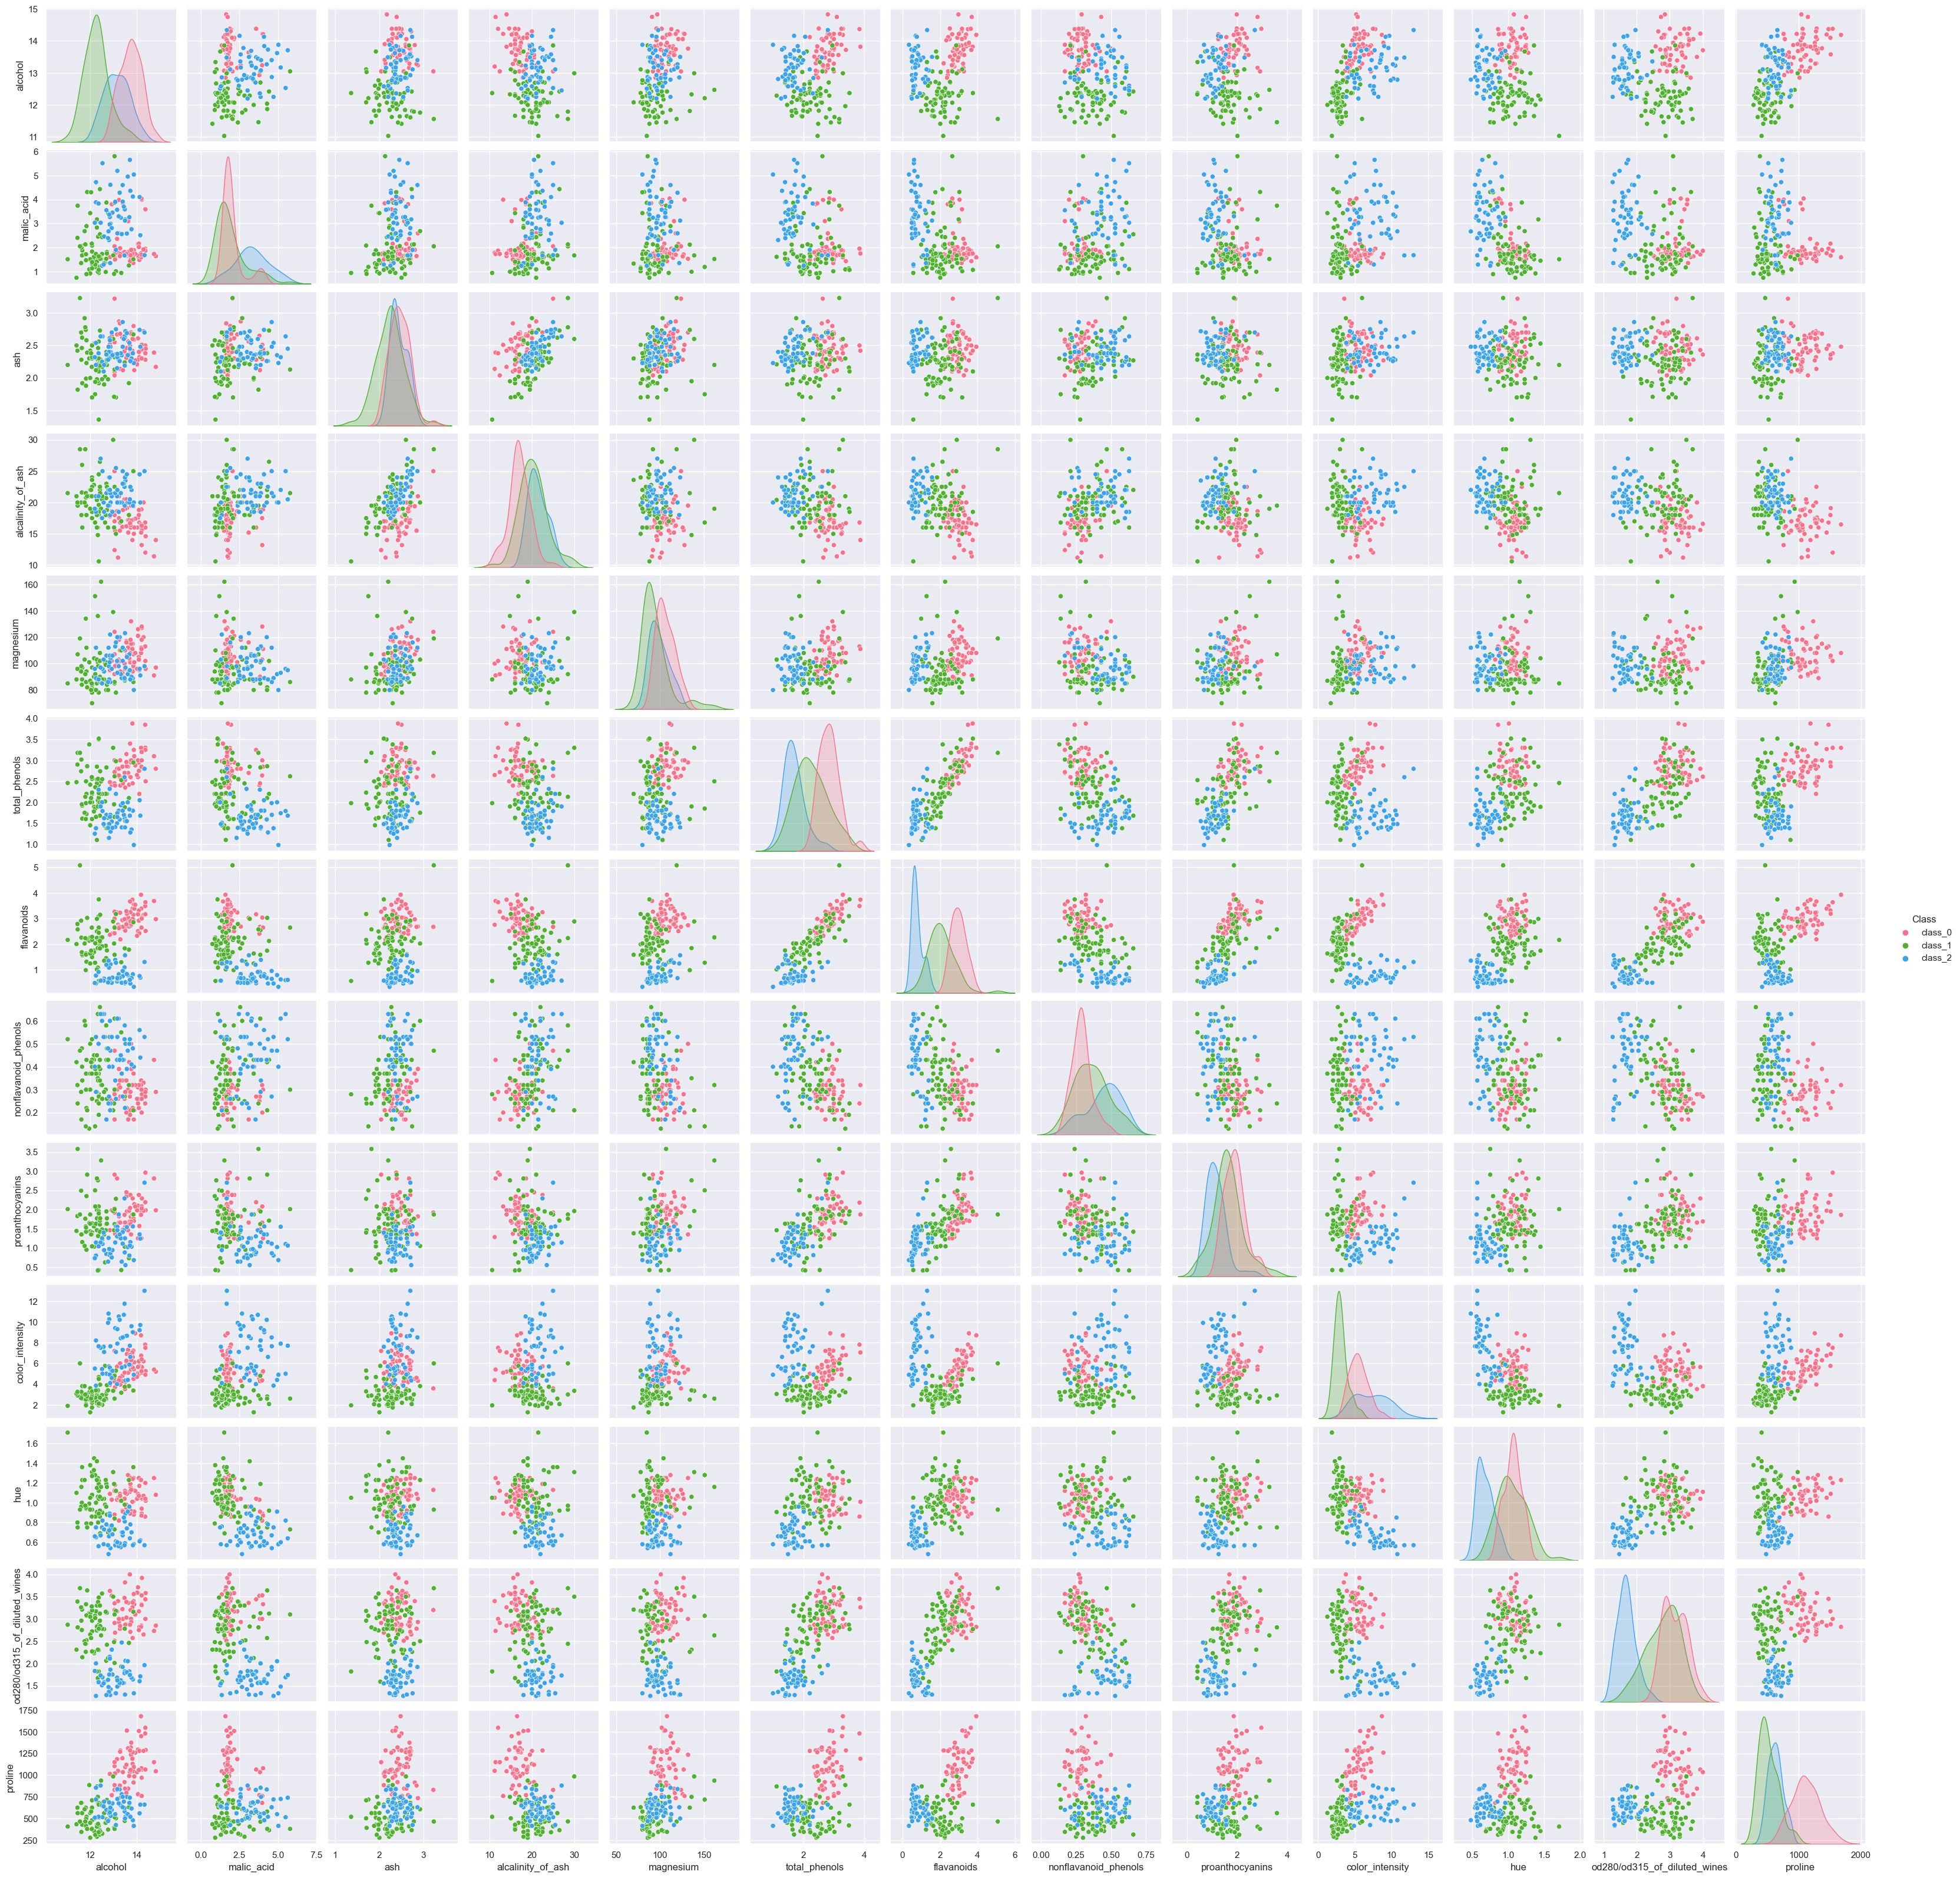

In [4]:
# 可視化してみる
#sns.pairplot(df, hue='Class', palette="husl")